In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)

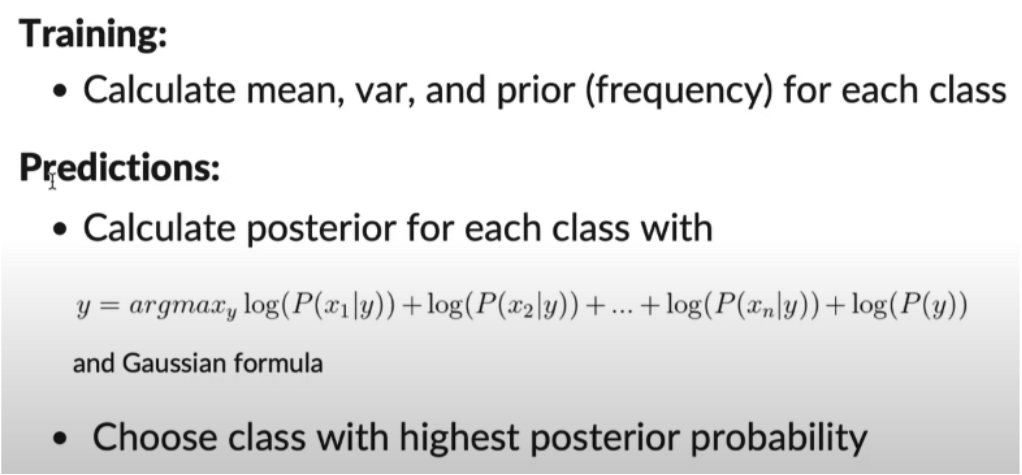

In [4]:
from PIL import Image

Image.open(os.path.join(WORK_DIR, 'images/pipeline.png'))

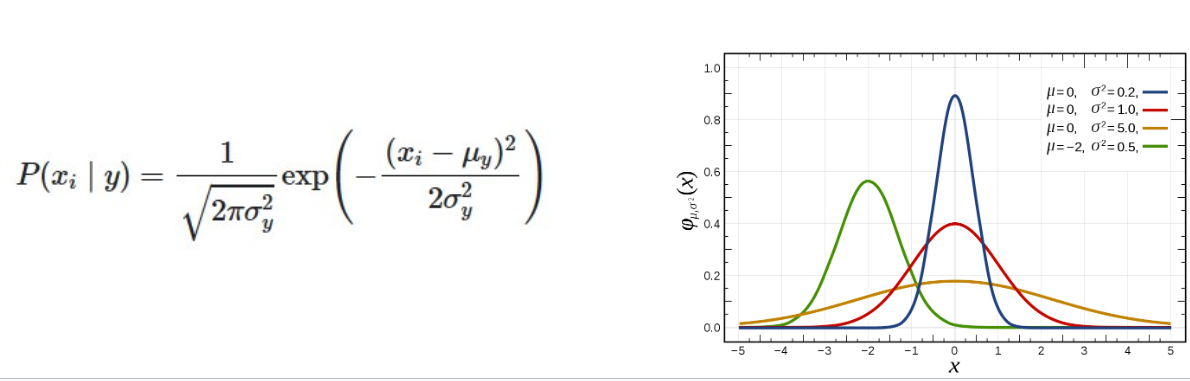

In [6]:
Image.open(os.path.join(WORK_DIR, 'images/pdf.png'))

In [38]:
class GaussianNB:
    
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i:] = X_c.mean(axis=0)
            self.var[i:] = X_c.var(axis=0)
            self.priors[i:] = X_c.shape[0] / float(n_samples)
            
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    
    def _predict(self, x):
        
        posteriors = []
        
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i])
            posterior = np.sum(np.log(self.gaussian(x, i))) + prior
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]
    
    
    def gaussian(self, x, classes_id):
        mean = self.mean[classes_id]
        var = self.var[classes_id]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        demoninator = np.sqrt(2 * np.pi * var)
        
        return numerator / demoninator

In [8]:
from sklearn import datasets

data = datasets.load_iris()

target = pd.DataFrame({'Label': data.target.tolist()}, index=range(len(data.target.tolist())))
target.replace({0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}, inplace=True)

features = pd.DataFrame({'sepal_length': data.data[:,0].tolist(), 'sepal_width': data.data[:,1].tolist(),
                         'petal_length': data.data[:,2].tolist(), 'petal_width': data.data[:,-1].tolist()}, index=range(len(data.data[:, 0].tolist())))

df = pd.concat([features, target], axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)

In [40]:
predict = nb.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(predict, y_test)

0.9666666666666667

In [48]:
results = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [51]:
results['label'] = y_test
results['predict'] = predict

In [52]:
results

,sepal_length,sepal_width,petal_length,petal_width,label,predict
0,5.0,2.0,3.5,1.0,Iris-Versicolour,Iris-Versicolour
1,6.4,3.2,4.5,1.5,Iris-Versicolour,Iris-Versicolour
2,6.7,2.5,5.8,1.8,Iris-Virginica,Iris-Virginica
3,6.0,3.0,4.8,1.8,Iris-Virginica,Iris-Virginica
4,6.5,3.0,5.2,2.0,Iris-Virginica,Iris-Virginica
5,6.5,3.2,5.1,2.0,Iris-Virginica,Iris-Virginica
6,5.0,3.5,1.3,0.3,Iris-Setosa,Iris-Setosa
7,7.2,3.6,6.1,2.5,Iris-Virginica,Iris-Virginica
8,6.1,2.8,4.7,1.2,Iris-Versicolour,Iris-Versicolour
9,5.0,3.6,1.4,0.2,Iris-Setosa,Iris-Setosa


<Axes: xlabel='petal_length', ylabel='petal_width'>

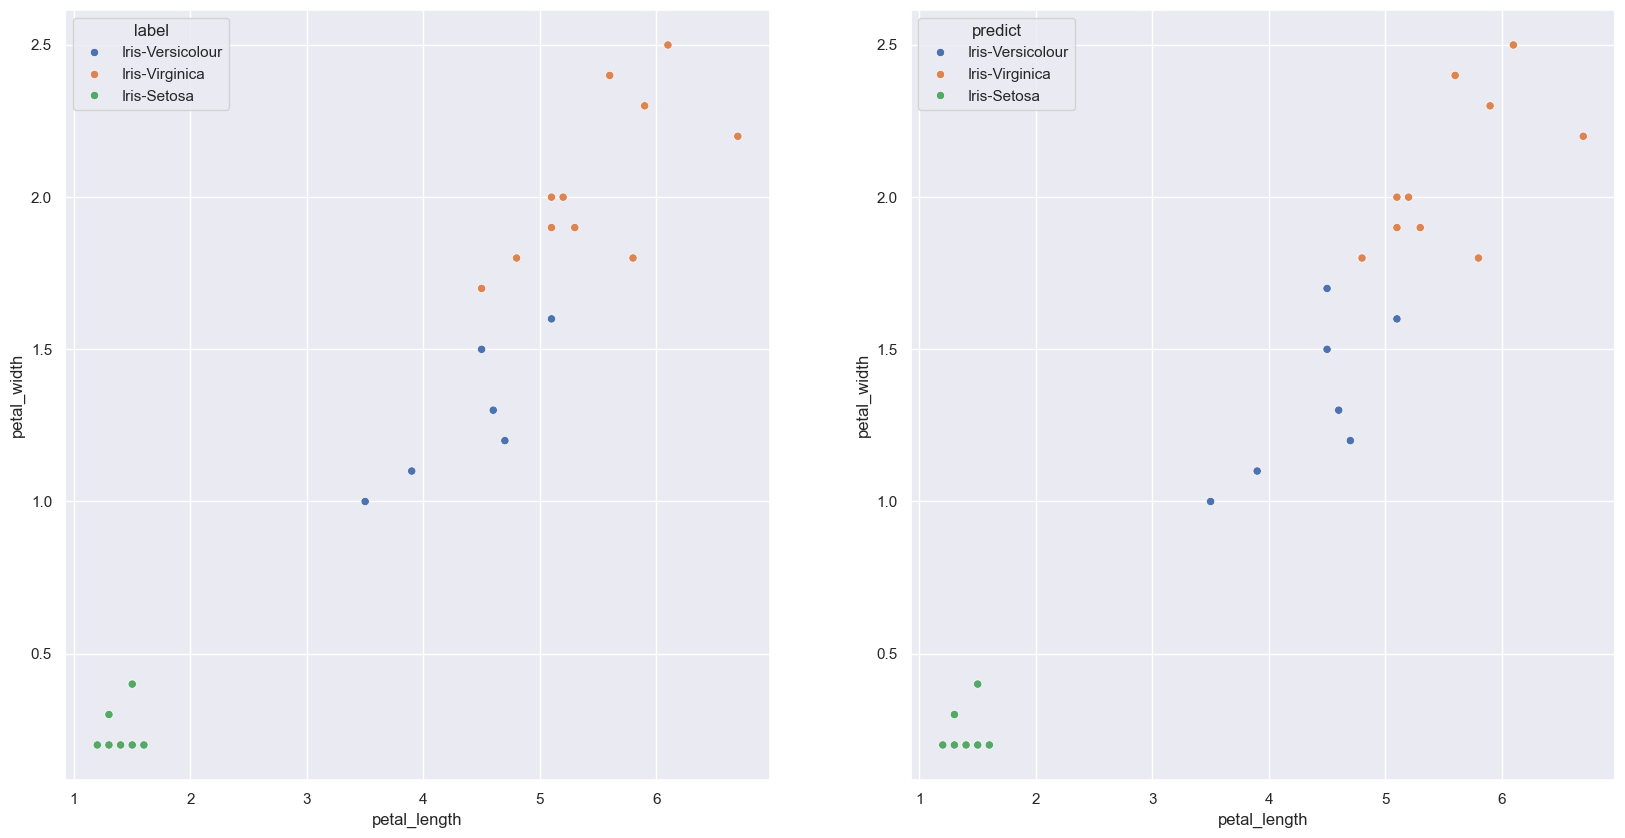

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=results, x="petal_length", y="petal_width", hue="label", ax=axes[0])
sns.scatterplot(data=results, x="petal_length", y="petal_width", hue="predict", ax=axes[1])

In [55]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
predict = nb.predict(X_test)

In [57]:
accuracy_score(predict, y_test)

0.9666666666666667